# Initial value problems

# Time Marching Methods: 

Let us consider the ODE

$$
y'' + 2\,y' - 0.5\,y = \cos(3t),
$$

with initial conditions

$$
y(0)=0,\quad y'(0)=0.
$$

Defining

$$
u = y,\quad v = y',
$$

the system can be arranged in a Cauchy-like form

$$
u' = v,\quad v' = \cos(3t) - 2\,v + 0.5\,u.
$$

A short calculation shows that the analytical solution is given by
$$y = \frac{e^{-\frac{1}{2} \left(\sqrt{6}+2\right) t} \left[\left(57-17 \sqrt{6}\right) e^{\sqrt{6} t}-6 e^{\sqrt{\frac{3}{2}} t+t} (19 \cos (3 t)-12 \sin (3 t))+17 \sqrt{6}+57\right]}{1515}$$


## Explicit/Implicit Euler and Crank–Nicolson

The time marching schemes are then applied to this system.

- **Explicit Euler:**  
  Updates are computed as
  $$
  \begin{aligned}
  u^{n+1} &= u^n + \Delta t\,v^n,\\[1mm]
  v^{n+1} &= v^n + \Delta t\,\Big(\cos(3t^n) - 2\,v^n + 0.5\,u^n\Big).
  \end{aligned}
  $$

- **Implicit Euler:**  
  Here the updates use the values at the new time level:
  $$
  \begin{aligned}
  u^{n+1} &= u^n + \Delta t\,v^{n+1},\\[1mm]
  v^{n+1} &= v^n + \Delta t\,\Big(\cos(3t^{n+1}) - 2\,v^{n+1} + 0.5\,u^{n+1}\Big).
  \end{aligned}
  $$
  By substituting the first equation into the second, one can derive
  $$
  v^{n+1} = \frac{v^n + \Delta t\,\cos(3t^{n+1}) + 0.5\,\Delta t\,u^n}{1 + 2\,\Delta t - 0.5\,\Delta t^2},
  $$
  and then
  $$
  u^{n+1} = u^n + \Delta t\,v^{n+1}.
  $$

- **Crank–Nicolson:**  
  This method averages the right-hand side at times $t^n$ and $t^{n+1}$:
  $$
  \begin{aligned}
  u^{n+1} &= u^n + \frac{\Delta t}{2}\,(v^n + v^{n+1}),\\[1mm]
  v^{n+1} &= v^n + \frac{\Delta t}{2}\Big[\big(\cos(3t^n)-2\,v^n+0.5\,u^n\big) + \big(\cos(3t^{n+1})-2\,v^{n+1}+0.5\,u^{n+1}\big)\Big].
  \end{aligned}
  $$
  Rearranging leads to a $2\times 2$ linear system in $u^{n+1}$ and $v^{n+1}$:
  $$
  \begin{aligned}
  u^{n+1} - \frac{\Delta t}{2}\,v^{n+1} &= u^n + \frac{\Delta t}{2}\,v^n,\\[1mm]
  -\frac{\Delta t}{4}\,u^{n+1} + \big(1+ \Delta t\big)v^{n+1} &= v^n + \frac{\Delta t}{2}\Big(\cos(3t^n)+\cos(3t^{n+1})-2\,v^n+0.5\,u^n\Big).
  \end{aligned}
  $$


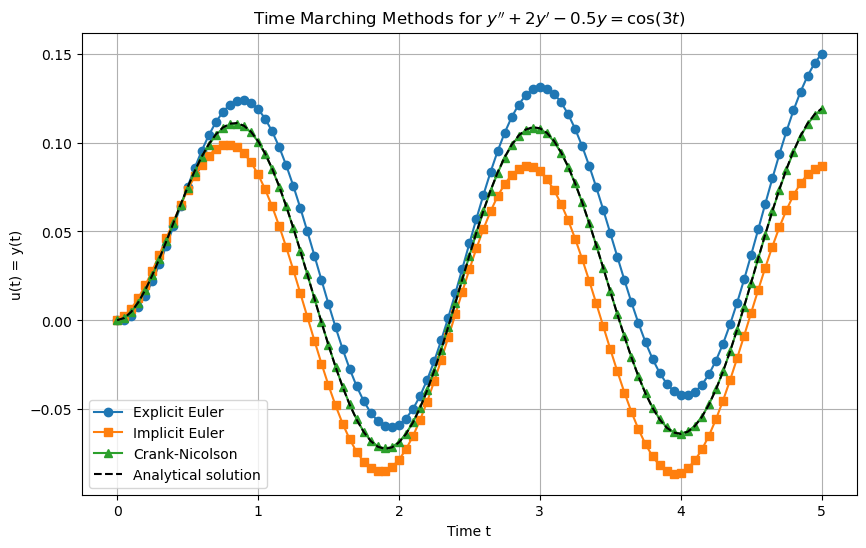

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Time parameters
t0, t_end = 0.0, 5.0
dt = 0.05
time = np.arange(t0, t_end+dt, dt)
N = len(time)

# Initial conditions: u(0)=y(0)=0, v(0)=y'(0)=0
u0, v0 = 0.0, 0.0

# Allocate arrays for each method
u_exp = np.zeros(N)
v_exp = np.zeros(N)
u_imp = np.zeros(N)
v_imp = np.zeros(N)
u_cn  = np.zeros(N)
v_cn  = np.zeros(N)

# Set initial conditions
u_exp[0], v_exp[0] = u0, v0
u_imp[0], v_imp[0] = u0, v0
u_cn[0],  v_cn[0]  = u0, v0

# --- Explicit Euler ---
for n in range(N-1):
    u_exp[n+1] = u_exp[n] + dt * v_exp[n]
    v_exp[n+1] = v_exp[n] + dt * ( np.cos(3*time[n]) - 2*v_exp[n] + 0.5*u_exp[n] )

# --- Implicit Euler ---
for n in range(N-1):
    # Using time t[n+1] for the forcing term
    v_imp[n+1] = ( v_imp[n] + dt * np.cos(3*time[n+1]) + 0.5*dt*u_imp[n] ) / (1 + 2*dt - 0.5*dt**2)
    u_imp[n+1] = u_imp[n] + dt * v_imp[n+1]

# --- Crank-Nicolson ---
for n in range(N-1):
    # Right-hand side for u-equation
    b1 = u_cn[n] + (dt/2)*v_cn[n]
    # Right-hand side for v-equation (using forcing terms at t[n] and t[n+1])
    b2 = v_cn[n] + (dt/2)*( np.cos(3*time[n]) + np.cos(3*time[n+1]) - 2*v_cn[n] + 0.5*u_cn[n] )
    b = np.array([b1, b2])
    # Coefficient matrix
    A = np.array([[1, -dt/2],
                  [-dt/4, 1+dt]])
    sol = np.linalg.solve(A, b)
    u_cn[n+1], v_cn[n+1] = sol

# Define the analytical solution (given to us):

t = time; 
u_analytical = np.exp(-0.5*(np.sqrt(6)+2)*t)*((57-17*np.sqrt(6))*np.exp(np.sqrt(6)*t) - 6*np.exp(np.sqrt(3/2)*t+t)*(19*np.cos(3*t)-12*np.sin(3*t)) + 17*np.sqrt(6)+57)/1515

# Plot the u (i.e., y) solutions
plt.figure(figsize=(10,6))
plt.plot(time, u_exp, 'o-', label='Explicit Euler')
plt.plot(time, u_imp, 's-', label='Implicit Euler')
plt.plot(time, u_cn, '^-', label='Crank-Nicolson')
plt.plot(t, u_analytical,'--k', label='Analytical solution'); 

plt.xlabel('Time t')
plt.ylabel('u(t) = y(t)')
plt.title('Time Marching Methods for $y\'\' + 2y\' - 0.5y = \\cos(3t)$')
plt.legend()
plt.grid(True)
plt.show()


## Runge–Kutta Methods

For a higher-order time stepping, we use the classical fourth-order Runge–Kutta (RK4) method. For our system

$$
u' = v,\quad v' = \cos(3t) - 2\,v + 0.5\,u,
$$

we define the state vector

$$
Y = \begin{pmatrix} u \\ v \end{pmatrix},
$$

and the function

$$
f(t,Y) = \begin{pmatrix} v \\ \cos(3t) - 2\,v + 0.5\,u \end{pmatrix}.
$$

The RK4 update is given by

$$
\begin{aligned}
k_1 &= f(t^n, Y^n),\\[1mm]
k_2 &= f\Big(t^n + \frac{\Delta t}{2},\, Y^n + \frac{\Delta t}{2}\, k_1\Big),\\[1mm]
k_3 &= f\Big(t^n + \frac{\Delta t}{2},\, Y^n + \frac{\Delta t}{2}\, k_2\Big),\\[1mm]
k_4 &= f\Big(t^n + \Delta t,\, Y^n + \Delta t\, k_3\Big),\\[1mm]
Y^{n+1} &= Y^n + \frac{\Delta t}{6}\,\big(k_1 + 2k_2 + 2k_3 + k_4\big).
\end{aligned}
$$


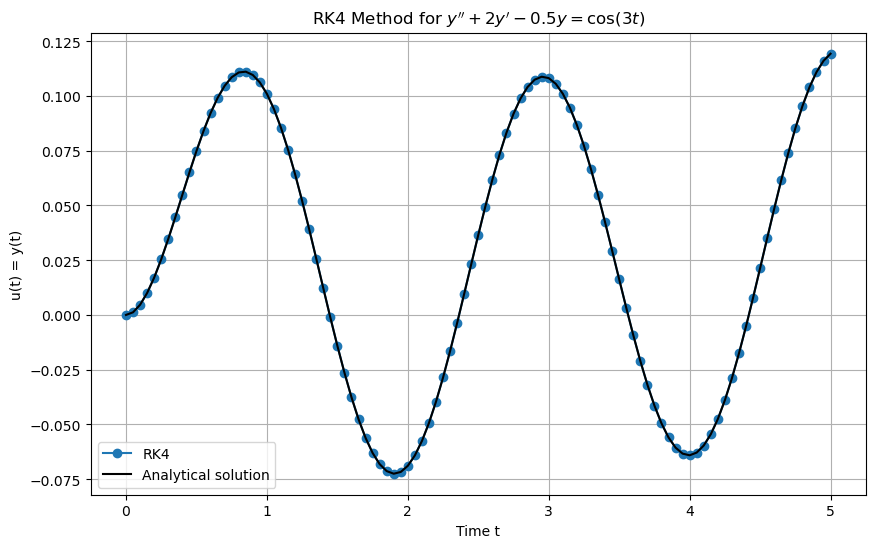

In [14]:
# Reset time parameters and initial conditions for RK4
time = np.arange(t0, t_end+dt, dt)
N = len(time)
u_rk = np.zeros(N)
v_rk = np.zeros(N)
u_rk[0], v_rk[0] = u0, v0

def f(t, Y):
    u, v = Y
    return np.array([v, np.cos(3*t) - 2*v + 0.5*u])

# RK4 loop
for n in range(N-1):
    t_n = time[n]
    Y_n = np.array([u_rk[n], v_rk[n]])
    k1 = f(t_n, Y_n)
    k2 = f(t_n + dt/2, Y_n + dt/2 * k1)
    k3 = f(t_n + dt/2, Y_n + dt/2 * k2)
    k4 = f(t_n + dt, Y_n + dt * k3)
    Y_np1 = Y_n + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
    u_rk[n+1], v_rk[n+1] = Y_np1

# Plot the RK4 solution for u (y)
plt.figure(figsize=(10,6))
plt.plot(time, u_rk, 'o-', label='RK4')
plt.plot(time, u_analytical,'k', label='Analytical solution')
plt.xlabel('Time t')
plt.ylabel('u(t) = y(t)')
plt.title('RK4 Method for $y\'\' + 2y\' - 0.5y = \\cos(3t)$')
plt.legend()
plt.grid(True)
plt.show()


## Backward Differentiation Formula (BDF) Methods

Backward Differentiation Formulas (BDF) are implicit multistep methods that work well for stiff problems. Here we illustrate the BDF2 method applied to our system

$$
u' = v,\quad v' = \cos(3t) - 2\,v + 0.5\,u.
$$

For non-autonomous problems, BDF2 is written as

$$
\frac{3Y^{n+1} - 4Y^n + Y^{n-1}}{2\Delta t} = f(t^{n+1},Y^{n+1}),
$$

or, in component form:

1. For $u$:
   $$
   \frac{3u^{n+1} - 4u^n + u^{n-1}}{2\Delta t} = v^{n+1},
   $$
   which rearranges to
   $$
   3u^{n+1} - 2\Delta t\,v^{n+1} = 4u^n - u^{n-1}.
   $$

2. For $v$:
   $$
   \frac{3v^{n+1} - 4v^n + v^{n-1}}{2\Delta t} = \cos(3t^{n+1}) - 2\,v^{n+1} + 0.5\,u^{n+1},
   $$
   leading to
   $$
   -\Delta t\,u^{n+1} + \big(3+4\Delta t\big)v^{n+1} = 4v^n - v^{n-1} + 2\Delta t\,\cos(3t^{n+1}).
   $$

Since BDF2 is a two-step method, we bootstrap it using RK4 for the first step.


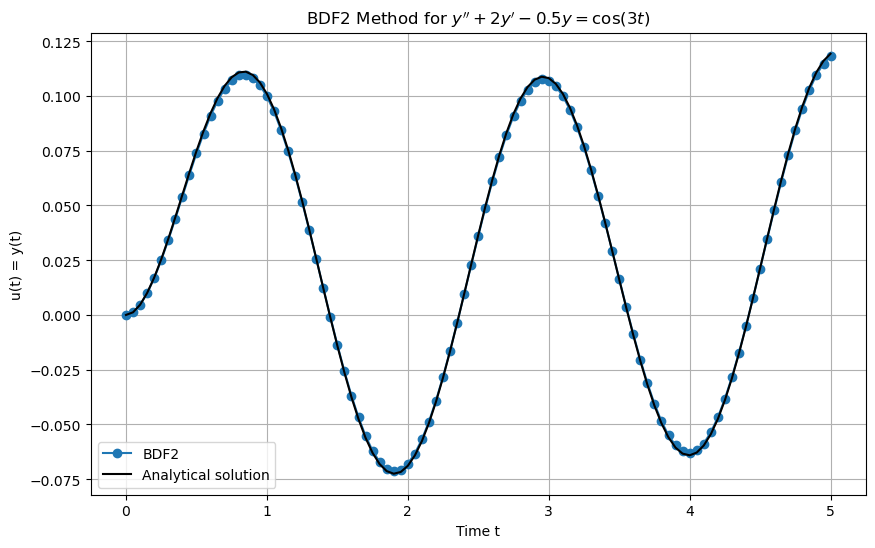

In [15]:
# Reset time parameters and initial conditions for BDF2
time = np.arange(t0, t_end+dt, dt)
N = len(time)
u_bdf = np.zeros(N)
v_bdf = np.zeros(N)
u_bdf[0], v_bdf[0] = u0, v0

# First step using RK4 to obtain u[1] and v[1]
def f(t, Y):
    u, v = Y
    return np.array([v, np.cos(3*t) - 2*v + 0.5*u])
Y0 = np.array([u0, v0])
k1 = f(t0, Y0)
k2 = f(t0 + dt/2, Y0 + dt/2 * k1)
k3 = f(t0 + dt/2, Y0 + dt/2 * k2)
k4 = f(t0 + dt, Y0 + dt * k3)
Y1 = Y0 + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
u_bdf[1], v_bdf[1] = Y1

# BDF2 loop for n >= 1
for n in range(1, N-1):
    # Set up the linear system for unknowns: U = u^{n+1}, V = v^{n+1}
    # Equation (1): 3U - 2*dt*V = 4*u_bdf[n] - u_bdf[n-1]
    # Equation (2): -dt*U + (3 + 4*dt)*V = 4*v_bdf[n] - v_bdf[n-1] + 2*dt*np.cos(3*time[n+1])
    A = np.array([[3, -2*dt],
                  [-dt, 3+4*dt]])
    b = np.array([4*u_bdf[n] - u_bdf[n-1],
                  4*v_bdf[n] - v_bdf[n-1] + 2*dt*np.cos(3*time[n+1])])
    sol = np.linalg.solve(A, b)
    u_bdf[n+1], v_bdf[n+1] = sol

# Plot the BDF2 solution for u (y)
plt.figure(figsize=(10,6))
plt.plot(time, u_bdf, 'o-', label='BDF2')
plt.plot(time, u_analytical,'k', label='Analytical solution')
plt.xlabel('Time t')
plt.ylabel('u(t) = y(t)')
plt.title('BDF2 Method for $y\'\' + 2y\' - 0.5y = \\cos(3t)$')
plt.legend()
plt.grid(True)
plt.show()


## Built-in IVP Solvers in Python

Python’s `scipy.integrate.solve_ivp` provides robust solvers that use adaptive time stepping. For our system

$$
u' = v,\quad v' = \cos(3t) - 2\,v + 0.5\,u,
$$

we define the function

$$
\text{fun}(t,Y) = \begin{pmatrix} v \\ \cos(3t) - 2\,v + 0.5\,u \end{pmatrix},
$$

with initial conditions

$$
Y(0) = \begin{pmatrix} 0 \\ 0 \end{pmatrix}.
$$

We then solve the IVP using methods like `RK23` and `RK45` from `scipy.integrate.solve_ivp`.


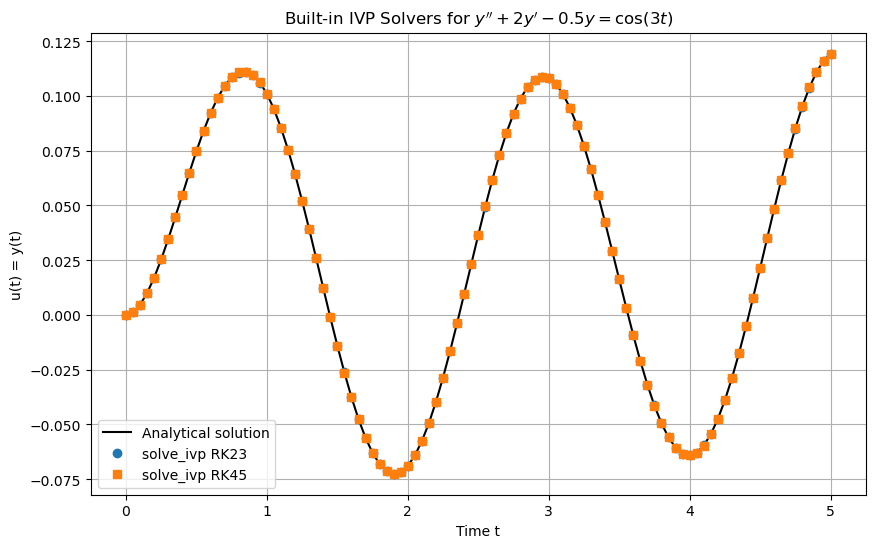

In [18]:
from scipy.integrate import solve_ivp

def fun(t, Y):
    u, v = Y
    return [v, np.cos(3*t) - 2*v + 0.5*u]

# Time span and evaluation points
t_span = (t0, t_end)
t_eval = np.linspace(t0, t_end, N)

# Initial conditions
Y0 = [u0, v0]

# Solve using RK23
sol_rk23 = solve_ivp(fun, t_span, Y0, method='RK23', t_eval=t_eval)
# Solve using RK45
sol_rk45 = solve_ivp(fun, t_span, Y0, method='RK45', t_eval=t_eval)

# Plot the solutions (u component corresponds to y)
plt.figure(figsize=(10,6))
plt.plot(time, u_analytical,'k', label='Analytical solution')
plt.plot(sol_rk23.t, sol_rk23.y[0], 'o', label='solve_ivp RK23')
plt.plot(sol_rk45.t, sol_rk45.y[0], 's', label='solve_ivp RK45')
plt.xlabel('Time t')
plt.ylabel('u(t) = y(t)')
plt.title('Built-in IVP Solvers for $y\'\' + 2y\' - 0.5y = \\cos(3t)$')
plt.legend()
plt.grid(True)
plt.show()


## A more advanced example: van der Pol Oscillator with Built-in IVP Solvers

The van der Pol oscillator is described by the second-order ODE

$$
u'' - \mu (1-u^2)u' + u = 0,
$$

which can be rewritten as a first-order system by letting

$$
u = x,\quad u' = v.
$$

Thus, we obtain

$$
\begin{aligned}
x' &= v,\\[1mm]
v' &= \mu (1-x^2)v - x.
\end{aligned}
$$

The parameter $\mu$ controls the nonlinearity and damping of the system. For small $\mu$, the oscillator behaves nearly linearly, whereas for larger $\mu$, the nonlinearity becomes dominant. In the plots below:
- The left column shows the time signal $u(t)$.
- The right column displays the corresponding phase portrait ($u'$ vs. $u$).

We consider three cases: $\mu=0.1$, $\mu=1.0$, and $\mu=5.0$, with initial conditions

$$
u(0)=2,\quad u'(0)=0.
$$

The built-in IVP solver `solve_ivp` from Python's SciPy library is used to solve the system. Unfortunately, there is no closed solution for $\mu > 0$. The best we can do is compare with [Wikipedia](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator) or [Wolfram](https://mathworld.wolfram.com/vanderPolEquation.html).


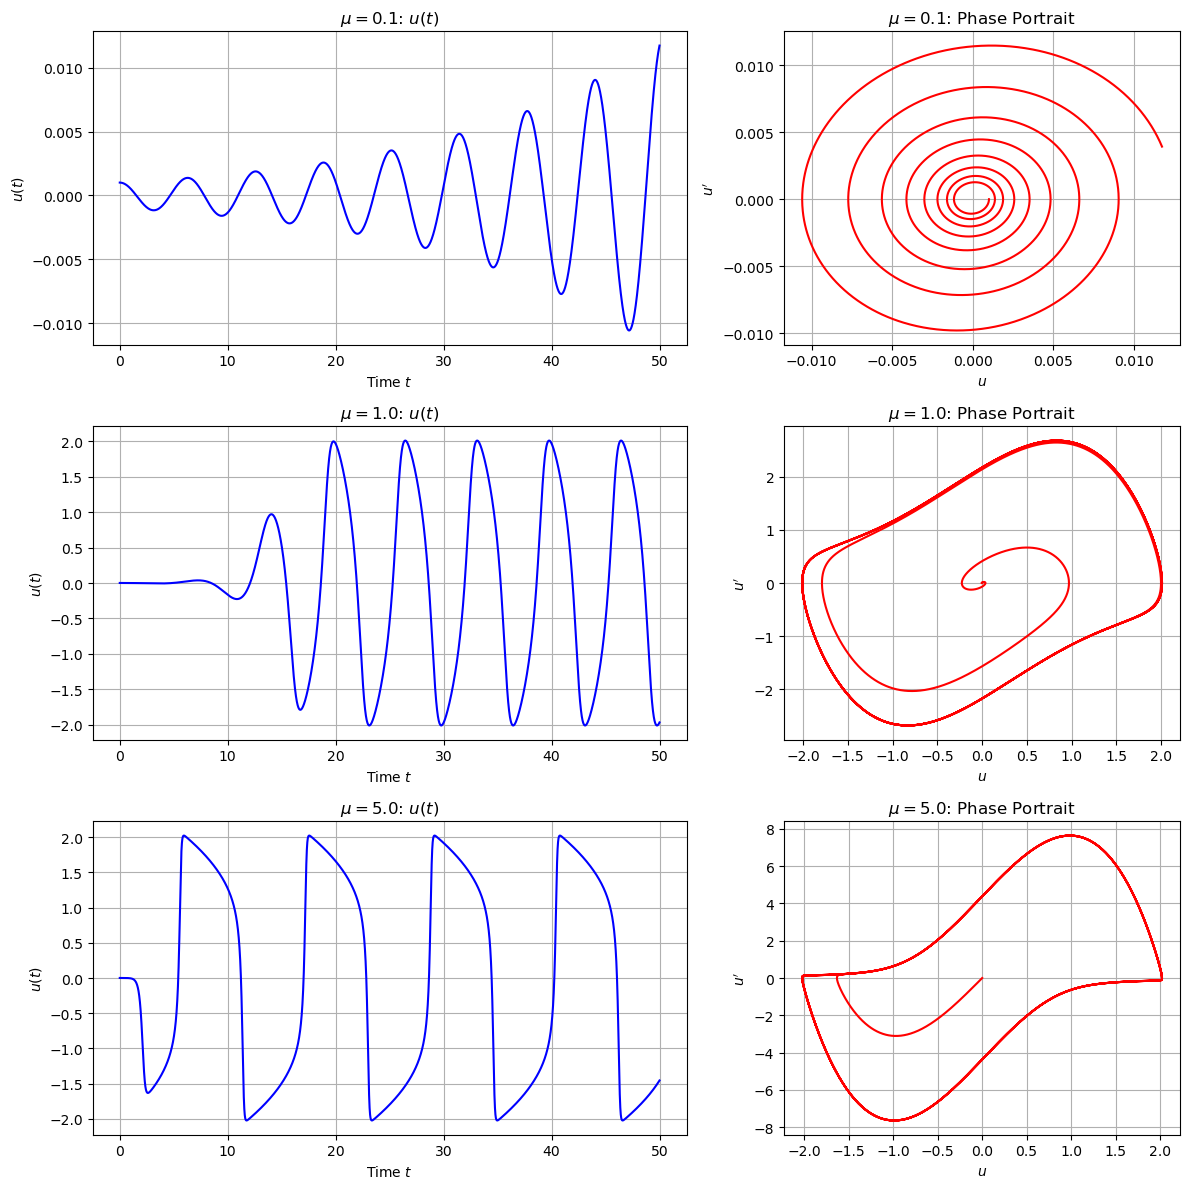

In [37]:
# Define the array of mu values and time span
mu_values = [0.1, 1.0, 5.0]
t_span = (0, 50)
# t_eval = np.linspace(t_span[0], t_span[1], 1000) # We can uncomment this if we want to pass the temporal grid to the solver explicitly
initial_conditions = [0.001, 0]  # u(0)=2, u'(0)=0

# Create a 3x2 array of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12), gridspec_kw={'width_ratios': [1.5, 1]})

# Loop over each mu value and solve the van der Pol ODE
for i, mu in enumerate(mu_values):
    # Define the van der Pol system for current mu
    def vdp(t, Y):
        u, v = Y
        return [v, mu * (1 - u**2) * v - u]

    # For this application, I will tweak the relative and absolute tolerances of the solver:
    sol = solve_ivp(vdp,t_span,initial_conditions,method='RK23',rtol=1e-8,atol=1e-10) # Add t_eval = t_eval if temporal grid is specified
    t, u, v = sol.t, sol.y[0], sol.y[1]
    
    # Plot u(t) vs. time in the left column
    axes[i, 0].plot(t, u, 'b-')
    axes[i, 0].set_title(f"$\\mu = {mu}$: $u(t)$")
    axes[i, 0].set_xlabel("Time $t$")
    axes[i, 0].set_ylabel("$u(t)$")
    axes[i, 0].grid(True)
    
    # Plot the phase portrait (u' vs. u) in the right column
    axes[i, 1].plot(u, v, 'r-')
    axes[i, 1].set_title(f"$\\mu = {mu}$: Phase Portrait")
    axes[i, 1].set_xlabel("$u$")
    axes[i, 1].set_ylabel("$u'$")
    axes[i, 1].grid(True)

plt.tight_layout()
plt.show()


## Another advanced example: Rayleigh–Plesset Equation: Bubble Dynamics

The dimensionless Rayleigh–Plesset equation governing the evolution of a bubble immersed in a liquid is given by

$$
R\, R'' + \frac{3}{2} R'^2 + \frac{4}{Re\,R} R' + S\,\frac{(1-R)}{R} + p(t) = 0,\quad t>0,
$$

where $Re$ (Reynolds) and $S$ (Weber) are dimensionless numbers, with initial conditions

$$
R(0)=1,\quad R'(0)=0.
$$

Here, $p(t)$ is the external pressure signal. In our example we take $p(t)=1$ and set $S=0.1$ to investigate the effect of different Reynolds numbers. 

To integrate the equation using a built-in RK45 solver, we first rewrite the second-order ODE as a first-order system. Let

$$
x = R,\quad y = R',
$$

so that the system becomes

$$
\begin{aligned}
x' &= y,\\[1mm]
y' &= -\frac{3}{2}\frac{y^2}{x} - \frac{4}{Re}\frac{y}{x^2} - S\,\frac{(1-x)}{x^2} - \frac{p(t)}{x}.
\end{aligned}
$$

We then solve this system and plot \( R(t) \) for the different values of \( Re \).


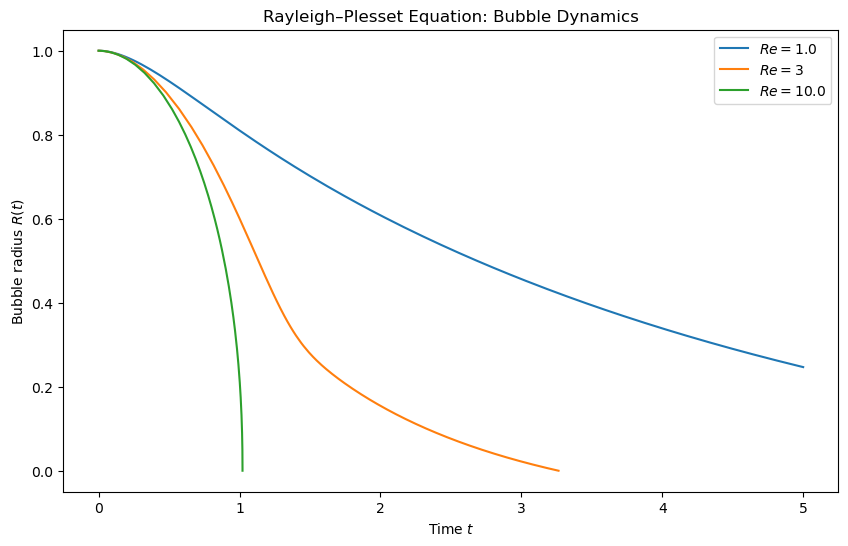

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# The integration will be halted when the radius of the bubble reaches a minium threshold value. We incorporate this using an 'event':
def event_R_min(t, Y, S, Re):
    R = Y[0]
    return R - 1e-3  # Event when R equals a threshold

event_R_min.terminal = True   # Stop integration when event is triggered
event_R_min.direction = -1    # Only trigger if R is decreasing past the threshold

# Fixed parameters
S = 0.1
p = lambda t: 1  # external pressure p(t)=1

# Reynolds numbers to test
Re_values = [1.0, 3, 10.0]

# Time span and evaluation points (optional)
t_span = (0,5)
# t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Initial conditions: R(0)=1, R'(0)=0
initial_conditions = [1, 0]

# Define the ODE system as a function with parameters S and Re
def rayleigh_plesset(t, Y, S, Re):
    x, y = Y  # x = R, y = R'
    # The Rayleigh-Plesset equation:
    #   x*y' + (3/2)*y^2 + (4/(Re*x))*y + S*(1-x)/x + p(t) = 0
    # Solve for y':
    dydt = (-1.5 * y**2 - (4/(Re*x))*y - S*(1-x)/x - p(t)) / x
    return [y, dydt]

# Plot the bubble radius R(t) for different Re values
plt.figure(figsize=(10, 6))
for Re in Re_values:
    sol = solve_ivp(rayleigh_plesset,t_span,initial_conditions,args=(S, Re), method='RK45',events=event_R_min,rtol=1e-8,atol=1e-10)
    plt.plot(sol.t, sol.y[0], label=f"$Re = {Re}$")

plt.xlabel("Time $t$")
plt.ylabel("Bubble radius $R(t)$")
plt.title("Rayleigh–Plesset Equation: Bubble Dynamics")
plt.legend()
plt.show()


## Consecutive Reaction Kinetics

Consider the consecutive reaction mechanism

$$
A \xrightarrow{k_1} B \xrightarrow{k_2} C,
$$

where the species concentrations, $[A] = a(t)$, $[B] = b(t)$, $[C] = c(t)$, evolve according to the mass-action kinetics:

$$
\begin{aligned}
\frac{da}{dt} &= -k_1\, a,\\[1mm]
\frac{db}{dt} &= k_1\, a - k_2\, b,\\[1mm]
\frac{dc}{dt} &= k_2\, b.
\end{aligned}
$$

with the initial conditions

$$
a(0)=a_0,\quad b(0)=0,\quad c(0)=0.
$$

For our example, we take typical rate constants $k_1 = 0.5$ and $k_2 = 0.3$ (arbitrary units) and $a_0=1$. We will integrate the system using Python's built-in RK45 solver from `scipy.integrate.solve_ivp` and plot the concentrations $a(t)$, $b(t)$, and $c(t)$ over time.


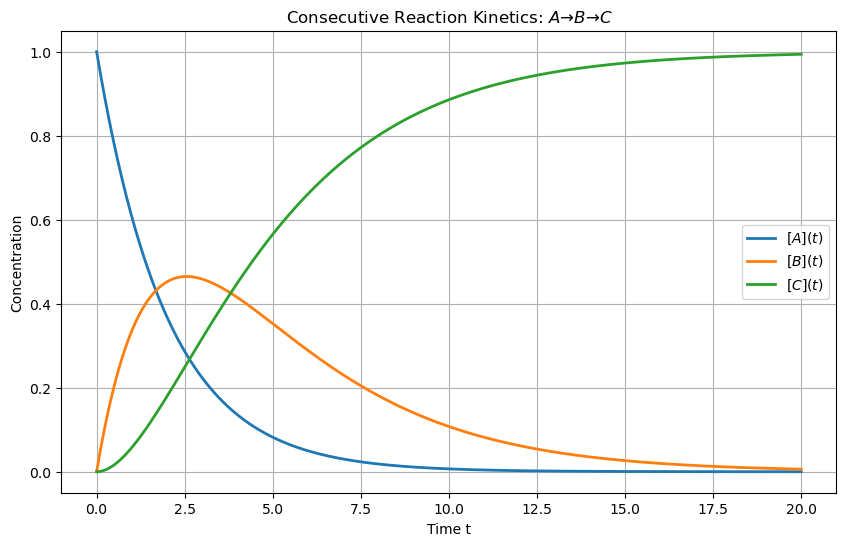

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Rate constants and initial condition
k1, k2 = 0.5, 0.3
a0 = 1.0
initial_conditions = [a0, 0.0, 0.0]  # a(0)=1, b(0)=0, c(0)=0

# Time span for the simulation
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Define the ODE system
def reaction_system(t, Y, k1, k2):
    a, b, c = Y
    da_dt = -k1 * a
    db_dt = k1 * a - k2 * b
    dc_dt = k2 * b
    return [da_dt, db_dt, dc_dt]

# Integrate the system using RK45
sol = solve_ivp(reaction_system, t_span, initial_conditions, t_eval=t_eval, args=(k1, k2))

# Extract the solution for each species
t = sol.t
a, b, c = sol.y

# Plot the concentration profiles
plt.figure(figsize=(10, 6))
plt.plot(t, a, label='$[A](t)$', lw=2)
plt.plot(t, b, label='$[B](t)$', lw=2)
plt.plot(t, c, label='$[C](t)$', lw=2)
plt.xlabel('Time t')
plt.ylabel('Concentration')
plt.title('Consecutive Reaction Kinetics: $A \\to B \\to C$')
plt.legend()
plt.grid(True)
plt.show()
